In [1]:
from plotnine import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/home/chris/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/chris/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data_file = "~/Documents/ogle/ogle4/smc/RRab_extra_extracted.csv"
data = pd.read_csv(data_file)

print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Data columns (total 21 columns):
R21                   4961 non-null float64
R31                   4961 non-null float64
amplitude_Iband       4961 non-null float64
amplitude_Vband       4027 non-null float64
id                    4961 non-null object
log_p                 4961 non-null float64
magnitude_Iband       4961 non-null float64
magnitude_Vband       4904 non-null float64
metalicity_jk_v       4805 non-null float64
metalicity_jkzw_v     4805 non-null float64
metalicity_neme       4805 non-null float64
metalicity_sand       4027 non-null float64
metalicity_smol       4805 non-null float64
period                4961 non-null float64
period_uncertainty    4961 non-null float64
phi21                 4949 non-null float64
phi31                 4805 non-null float64
phi31_i_sine          4805 non-null float64
phi31_v_deb           4805 non-null float64
phi31_v_skow          4805 non-null float64
time_max_brigh

,R21,R31,amplitude_Iband,amplitude_Vband,log_p,magnitude_Iband,magnitude_Vband,metalicity_jk_v,metalicity_jkzw_v,metalicity_neme,metalicity_sand,metalicity_smol,period,period_uncertainty,phi21,phi31,phi31_i_sine,phi31_v_deb,phi31_v_skow,time_max_bright
count,4961.000000,4961.000000,4961.000000,4027.000000,4961.000000,4961.000000,4904.000000,4805.000000,4805.000000,4805.000000,4027.000000,4805.000000,4961.000000,4.961000e+03,4949.000000,4805.000000,4805.000000,4805.000000,4805.000000,4961.000000
mean,0.415158,0.289244,0.496274,0.808248,-0.225118,18.841414,19.421777,-1.557591,-1.835471,-1.703482,-1.524459,-1.450381,0.598340,3.036444e-06,4.301884,2.459418,5.601011,4.974542,4.979522,6000.297199
std,0.068938,0.085989,0.160099,0.246728,0.042431,0.901787,0.909032,0.314239,0.329951,0.492473,0.279410,0.289184,0.058498,3.923547e-06,0.201403,0.424490,0.424490,0.241111,0.277712,0.175191
min,0.000000,0.000000,0.025000,0.064554,-0.426792,12.048000,12.632000,-3.756821,-4.144662,-5.426348,-3.558517,-3.436670,0.374290,1.000000e-07,3.206000,0.316000,3.457593,3.757081,4.196309,6000.000020
25%,0.378000,0.247000,0.383000,0.633822,-0.249989,18.916000,19.490000,-1.739386,-2.026356,-2.000393,-1.664417,-1.616330,0.562355,1.200000e-06,4.165000,2.157000,5.298593,4.802769,4.782216,6000.148640
50%,0.420000,0.307000,0.492000,0.810855,-0.222972,19.061000,19.639000,-1.585014,-1.864265,-1.740070,-1.518374,-1.469485,0.598451,2.100000e-06,4.270000,2.402000,5.543593,4.941929,4.922539,6000.294510
75%,0.457000,0.349000,0.607000,0.980141,-0.199234,19.182000,19.763000,-1.420579,-1.691608,-1.436106,-1.361231,-1.307462,0.632072,3.500000e-06,4.410000,2.714000,5.855593,5.119145,5.122437,6000.442070
max,1.553000,0.863000,1.053000,2.275827,-0.010778,20.419000,21.303000,3.464289,3.437504,0.252668,0.101733,1.715510,0.975487,1.065000e-04,5.406000,5.795000,8.936593,6.869153,8.371803,6000.920100


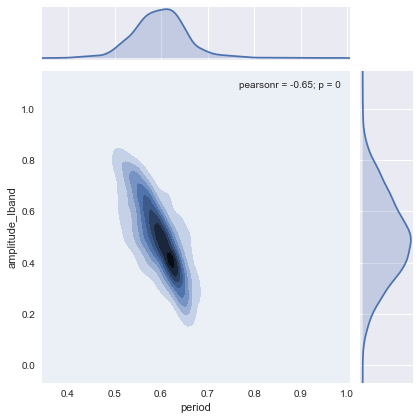

In [3]:
sns.jointplot(x="period", y="amplitude_Iband", data=data, kind="kde")
plt.show()

In [4]:
spec_features = ["period", "amplitude_Iband"]
#spec_features = ["log_p", "amplitude_Iband", "metalicity_neme", "phi31",  "metalicity_smol", "metalicity_jkzw_v"
#                 , "metalicity_sand"]
spec_X = data.as_matrix(spec_features)

spec_X = spec_X[~np.isnan(spec_X).any(axis=1)]

In [5]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

spec = SpectralClustering(n_clusters=7, affinity='nearest_neighbors',
                           assign_labels='kmeans', random_state = 1)
#spec = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
#                           assign_labels='kmeans', random_state = 1)
#spec = KMeans(n_clusters=3, random_state=0)
scaler = StandardScaler()
spec_pipe = make_pipeline(scaler, spec)
#spec_clusters = spec_pipe.fit_predict(spec_X[:,[0,3]])
spec_clusters = spec_pipe.fit_predict(spec_X)

In [6]:
spec_data = data.copy()
spec_data["spec_clusters"] = spec_clusters

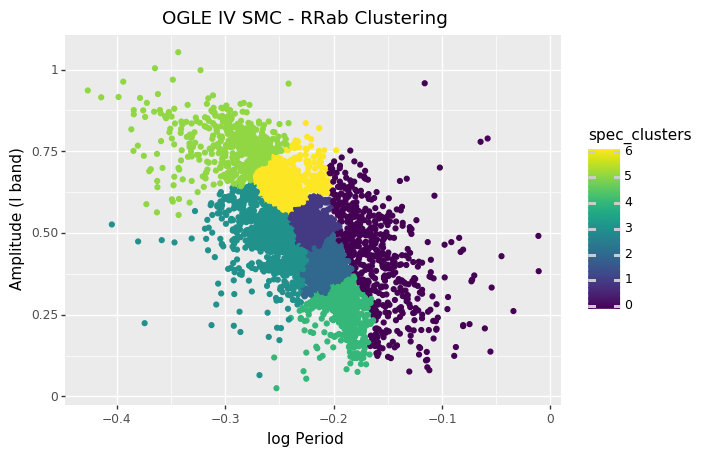

<ggplot: (8741185105654)>

In [7]:
ggplot(spec_data, aes("log_p", "amplitude_Iband", color = "spec_clusters")) +\
    geom_point() +\
    xlab("log Period") +\
    ylab("Amplitude (I band)") +\
    ggtitle("OGLE IV SMC - RRab Clustering")

In [8]:
spec_data["is_oost_ii"] = spec_data["spec_clusters"].map(lambda x: x == 0)

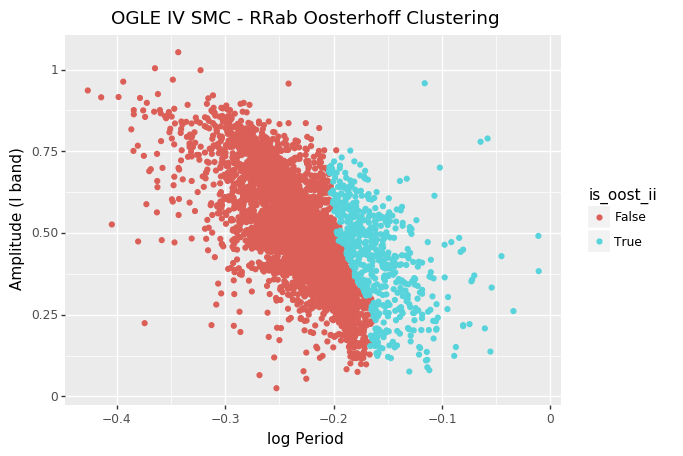

<ggplot: (8741185072069)>

In [9]:
ggplot(spec_data, aes("log_p", "amplitude_Iband", color = "is_oost_ii")) +\
    geom_point() +\
    xlab("log Period") +\
    ylab("Amplitude (I band)") +\
    ggtitle("OGLE IV SMC - RRab Oosterhoff Clustering")

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 156 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


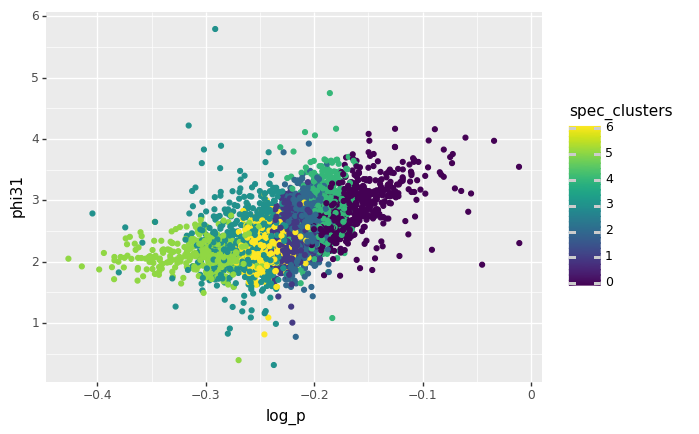

<ggplot: (-9223363295677546352)>

In [10]:
ggplot(spec_data, aes("log_p", "phi31", color = "spec_clusters")) +\
    geom_point()

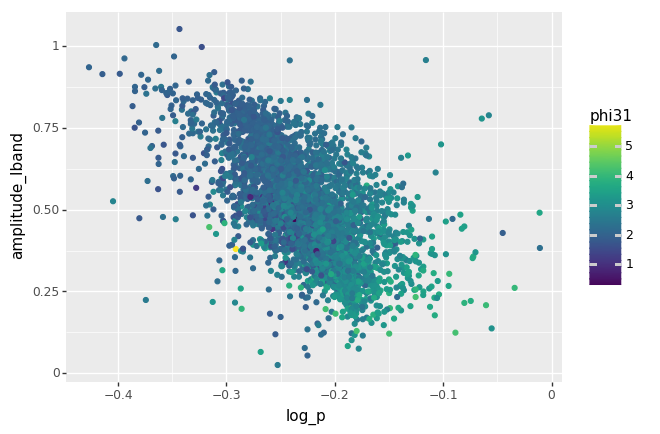

<ggplot: (8741177278121)>

In [11]:
ggplot(spec_data[spec_data["metalicity_neme"] < 4], aes("log_p", "amplitude_Iband", color = "phi31")) +\
    geom_point()

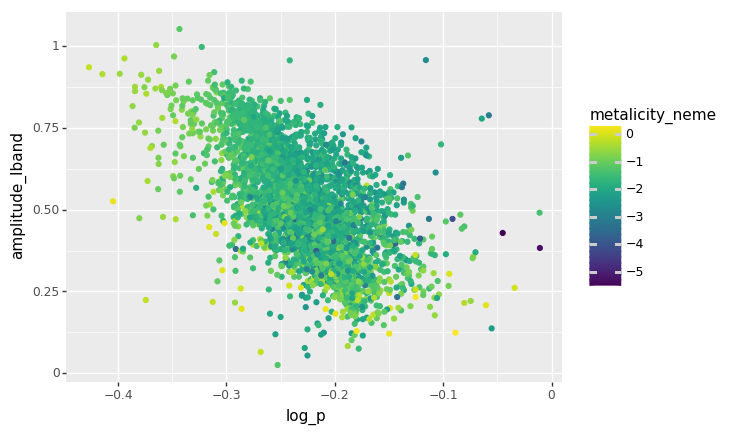

<ggplot: (-9223363295677676579)>

In [12]:
ggplot(spec_data[spec_data["metalicity_neme"] < 4], aes("log_p", "amplitude_Iband", color = "metalicity_neme")) +\
    geom_point()

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 1048 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


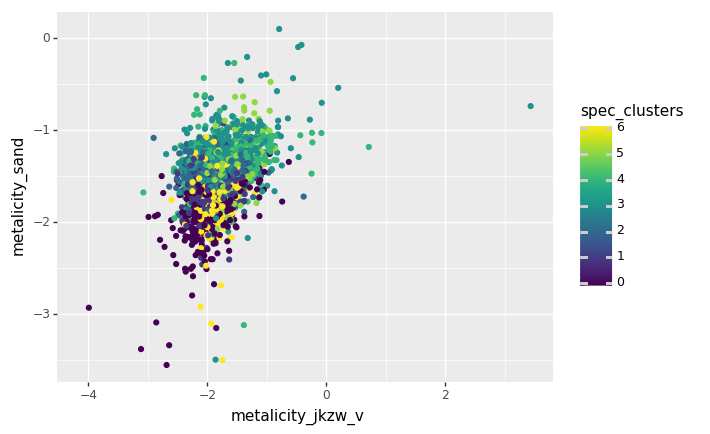

<ggplot: (8741177041742)>

In [13]:
ggplot(spec_data, aes("metalicity_jkzw_v", "metalicity_sand", color = "spec_clusters")) +\
    geom_point()

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 156 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


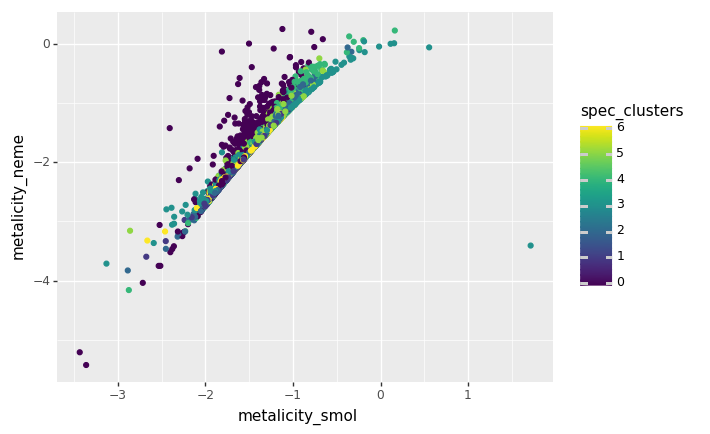

<ggplot: (8741177277118)>

In [14]:
ggplot(spec_data, aes("metalicity_smol", "metalicity_neme", color = "spec_clusters")) +\
    geom_point()

In [15]:
lmc_file = "~/Documents/ogle/ogle4/lmc/RRab.csv"
lmc = pd.read_csv(lmc_file)

print(lmc.info())
lmc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27620 entries, 0 to 27619
Data columns (total 11 columns):
id                    27620 non-null object
magnitude_Iband       27620 non-null float64
magnitude_Vband       27138 non-null float64
period                27620 non-null float64
period_uncertainty    27620 non-null float64
time_max_bright       27620 non-null float64
amplitude_Iband       27620 non-null float64
R21                   27620 non-null float64
phi21                 27497 non-null float64
R31                   27620 non-null float64
phi31                 26624 non-null float64
dtypes: float64(10), object(1)
memory usage: 2.3+ MB
None


,magnitude_Iband,magnitude_Vband,period,period_uncertainty,time_max_bright,amplitude_Iband,R21,phi21,R31,phi31
count,27620.000000,27138.000000,27620.000000,2.762000e+04,2.762000e+04,27620.000000,27620.000000,27497.000000,27620.000000,26624.000000
mean,18.733973,19.337262,0.579141,1.950930e-06,6.088792e+03,0.534204,0.444001,4.336701,0.292211,2.563111
std,0.496573,0.524604,0.071696,2.418125e-06,1.470856e+04,0.185513,0.071497,0.234461,0.090596,0.481275
min,12.785000,12.752000,0.257708,1.000000e-07,6.000000e+03,0.013000,0.000000,0.114000,0.000000,0.020000
25%,18.662000,19.227000,0.530268,8.000000e-07,6.000142e+03,0.407000,0.415000,4.162000,0.247000,2.206000
50%,18.782000,19.360000,0.576332,1.200000e-06,6.000284e+03,0.542000,0.457000,4.296000,0.317000,2.508000
75%,18.903000,19.509000,0.622661,2.200000e-06,6.000428e+03,0.669000,0.488000,4.489000,0.359000,2.879000
max,20.948000,22.325000,0.980259,6.070000e-05,2.450455e+06,1.632000,0.899000,5.786000,0.856000,6.271000


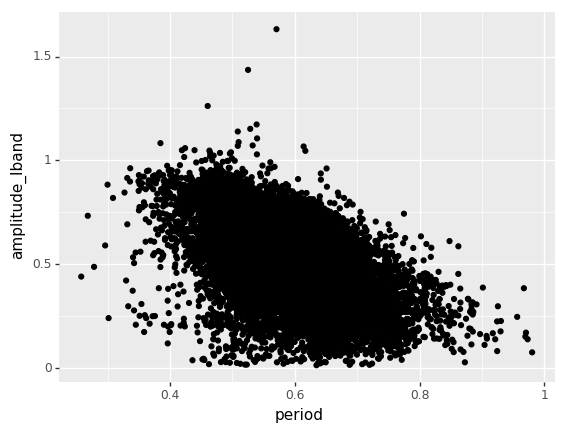

<ggplot: (8741177864873)>

In [16]:
ggplot(lmc, aes("period", "amplitude_Iband")) +\
    geom_point()

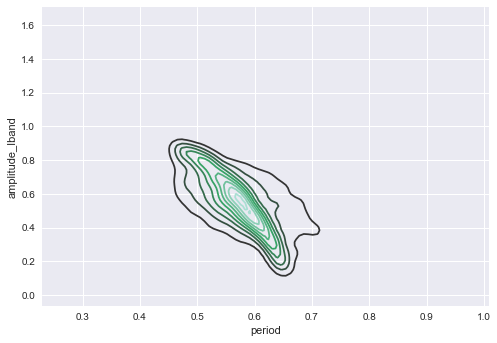

In [17]:
sns.kdeplot(lmc["period"], lmc["amplitude_Iband"])
plt.show()

In [18]:
spec_features = ["period", "amplitude_Iband"]
#spec_features = ["log_p", "amplitude_Iband", "metalicity_neme", "phi31",  "metalicity_smol", "metalicity_jkzw_v"
#                 , "metalicity_sand"]
spec_X = lmc.as_matrix(spec_features)

spec_X = spec_X[~np.isnan(spec_X).any(axis=1)]

In [19]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#spec = SpectralClustering(n_clusters=7, affinity='nearest_neighbors',
#                           assign_labels='kmeans', random_state = 1)
spec = SpectralClustering(n_clusters=7, affinity='nearest_neighbors',
                           assign_labels='kmeans', random_state = 1)
#spec = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
#                           assign_labels='kmeans', random_state = 1)
#spec = KMeans(n_clusters=3, random_state=0)
scaler = StandardScaler()
spec_pipe = make_pipeline(scaler, spec)
#spec_clusters = spec_pipe.fit_predict(spec_X[:,[0,3]])
spec_clusters = spec_pipe.fit_predict(spec_X)

In [20]:
spec_data_lmc = lmc.copy()
spec_data_lmc["spec_clusters"] = spec_clusters

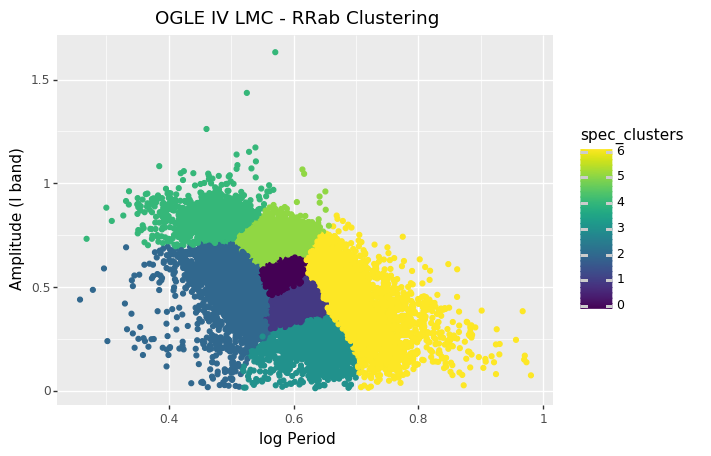

<ggplot: (-9223363295683460569)>

In [21]:
ggplot(spec_data_lmc, aes("period", "amplitude_Iband", color="spec_clusters")) +\
    geom_point() +\
    xlab("log Period") +\
    ylab("Amplitude (I band)") +\
    ggtitle("OGLE IV LMC - RRab Clustering")

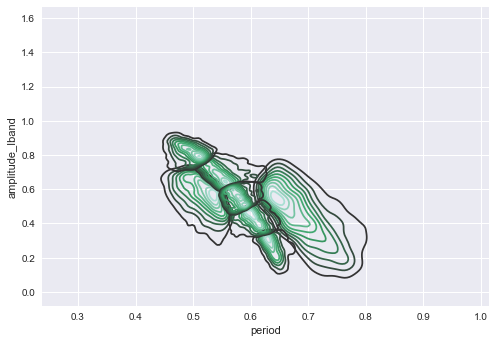

In [22]:
for index, category in enumerate(spec_data_lmc["spec_clusters"].unique()):
    d = spec_data_lmc[spec_data_lmc["spec_clusters"] == category]
    sns.kdeplot(d["period"], d["amplitude_Iband"])

plt.show()

In [23]:
spec_data_lmc["is_oost_ii"] = spec_data_lmc["spec_clusters"].map(lambda x: x == 6)

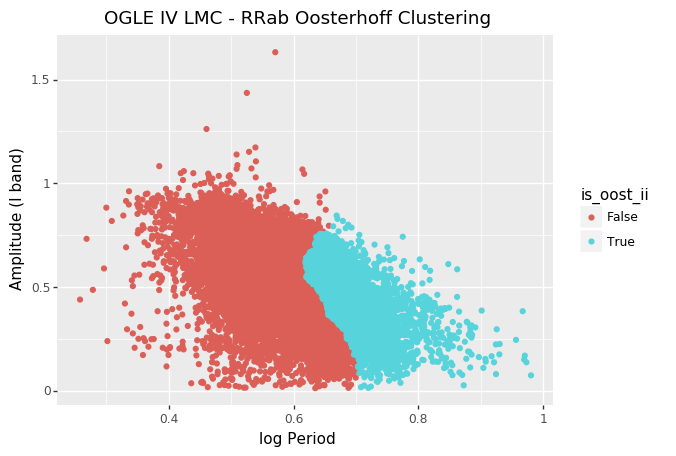

<ggplot: (8741171443846)>

In [24]:
ggplot(spec_data_lmc, aes("period", "amplitude_Iband", color="is_oost_ii")) +\
    geom_point() +\
    xlab("log Period") +\
    ylab("Amplitude (I band)") +\
    ggtitle("OGLE IV LMC - RRab Oosterhoff Clustering")

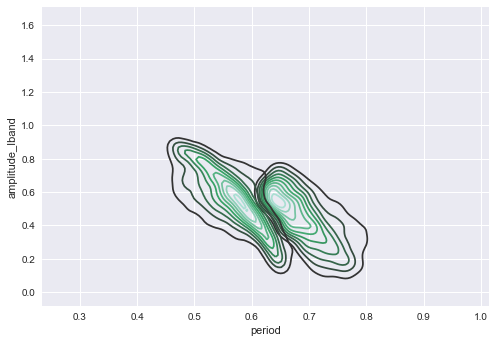

In [25]:
for index, category in enumerate(spec_data_lmc["is_oost_ii"].unique()):
    d = spec_data_lmc[spec_data_lmc["is_oost_ii"] == category]
    sns.kdeplot(d["period"], d["amplitude_Iband"])

plt.show()

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import RobustScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors.kde import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, kernel="exponential", **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

#scaler = RobustScaler()

#iso = OneClassSVM(nu=0.1, kernel="poly")

#outlier_pipe = make_pipeline(scaler, iso)
#outlier_pipe.fit(spec_data_lmc.as_matrix(["period", "amplitude_Iband"]))

#spec_data_lmc["iso_inlier"] = outlier_pipe.predict(spec_data_lmc.as_matrix(["period", "amplitude_Iband"]))

#spec_data_lmc["iso_inlier"] = density.score(spec_data_lmc.as_matrix(["period", "amplitude_Iband"]))

x = np.array(spec_data_lmc["period"])
y = np.array(spec_data_lmc["amplitude_Iband"])

xx, yy, zz = kde2D(x, y, 0.2)

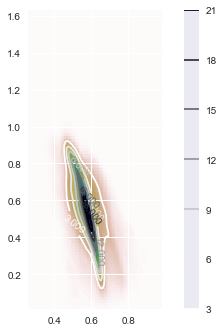

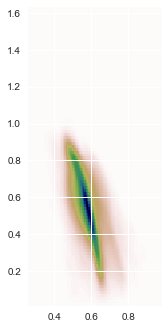

In [27]:
from scipy import stats

x_a = np.array(spec_data_lmc["period"])
y_a = np.array(spec_data_lmc["amplitude_Iband"])
points = np.vstack([x_a.ravel(), y_a.ravel()])

xmin, xmax = min(x_a), max(x_a)
ymin, ymax = min(y_a), max(y_a)

x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])
values = np.vstack([x_a, y_a])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, x.shape)

#x1, y1 = 2.5, 1.5

plt.imshow(np.rot90(f), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
# Draw contour lines
cset = plt.contour(x,y,f)
plt.clabel(cset, inline=1, fontsize=10)
plt.colorbar()
# Plot point
#plt.scatter(x1, y1, c='r', s=35)
plt.show()

X = x
Y = y
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
#ax.plot(x_a, y_a, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [28]:
spec_data_lmc["density"] = kernel.evaluate(points)

dense = spec_data_lmc[spec_data_lmc["density"] > 12]

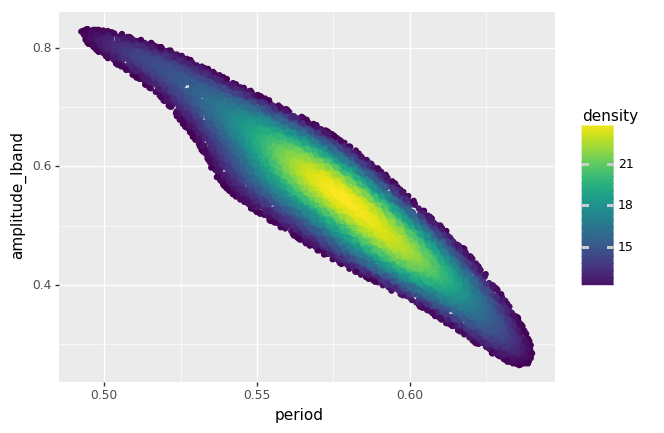

<ggplot: (-9223363295677614413)>

In [29]:
ggplot(dense, aes("period", "amplitude_Iband", color="density")) +\
    geom_point()

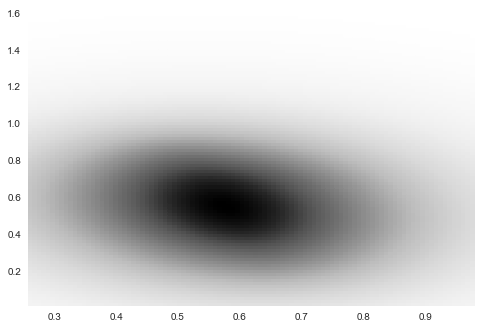

In [30]:
plt.pcolormesh(xx, yy, zz)
#plt.scatter(x, y, s=2, facecolor='white')
plt.show()

In [32]:
#spec_data_lmc["iso_inlier"].describe()

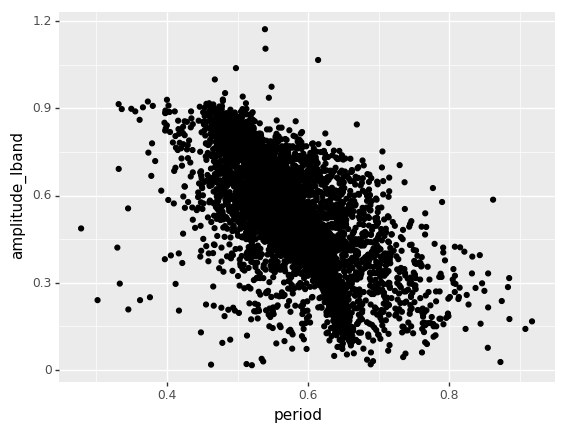

<ggplot: (-9223363295683281422)>

In [33]:
ggplot(spec_data_lmc.iloc[:5000], aes("period", "amplitude_Iband")) +\
    geom_point()

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
reg = LinearRegression()

poly_regression = make_pipeline(poly, reg)

#print(spec_X[:,[0]][:1000])
#inliers = spec_data_lmc[spec_data_lmc["iso_inlier"] == 1.0]

#poly_regression.fit(inliers.as_matrix(["period"]), inliers.as_matrix(["amplitude_Iband"]))
poly_regression.fit(dense.as_matrix(["period"]), dense.as_matrix(["amplitude_Iband"]))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [87]:
coef = reg.coef_

print("amp = %f + %f * per + %f * per^2 + %f * per^3" % (coef[0][0], coef[0][1], coef[0][2], coef[0][3]))
print(coef)

amp = 0.000000 + -105.972926 * per + 183.400620 * per^2 + -109.251644 * per^3
[[   0.         -105.97292589  183.40061974 -109.25164432]]


In [64]:
X_reg = spec_data_lmc.as_matrix(["period"])
y_reg = poly_regression.predict(X_reg)

reg_data = pd.DataFrame(X_reg, columns=["X"])
reg_data["y"] = y_reg

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 2427 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


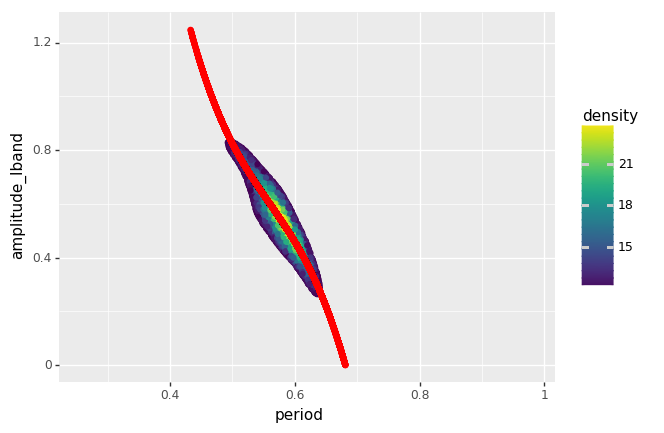

<ggplot: (8741170812827)>

In [65]:
ggplot(dense, aes("period", "amplitude_Iband", color="density")) +\
    geom_point() +\
    geom_point(aes("X", "y"), data=reg_data, color="Red") +\
    ylim(0.0, 1.25)

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 2427 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


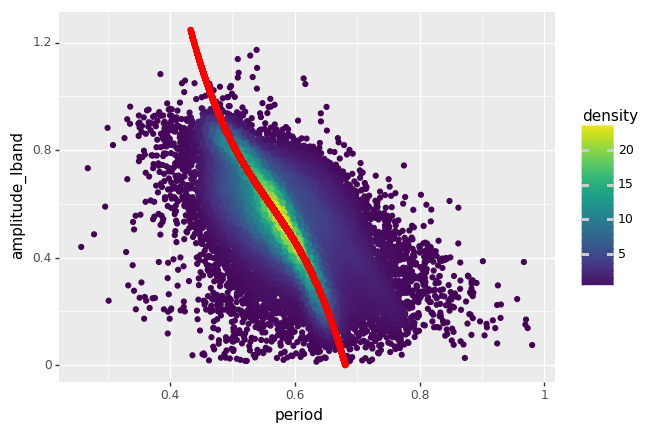

<ggplot: (-9223363295683883162)>

In [66]:
ggplot(spec_data_lmc, aes("period", "amplitude_Iband", color="density")) +\
    geom_point() +\
    geom_point(aes("X", "y"), data=reg_data, color="Red") +\
    ylim(0.0, 1.25)

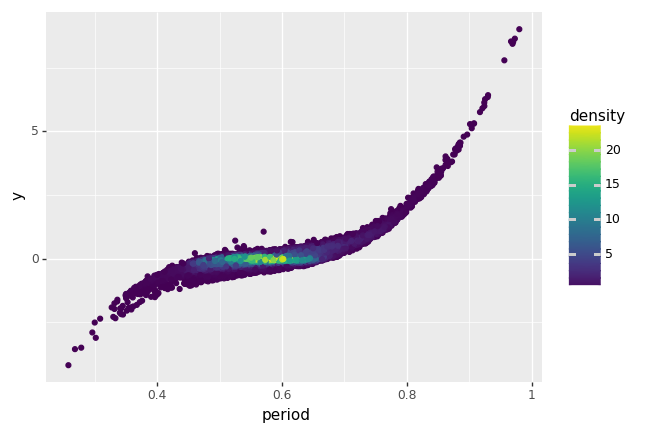

<ggplot: (8741169683362)>

In [67]:
spec_data_lmc["y"] = spec_data_lmc["amplitude_Iband"] - reg_data["y"]

ggplot(spec_data_lmc, aes("period", "y", color="density")) +\
    geom_point()

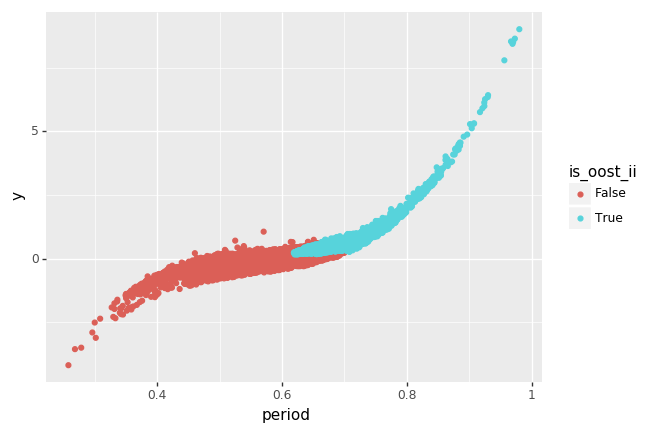

<ggplot: (8741170975443)>

In [68]:
ggplot(spec_data_lmc, aes("period", "y", color="is_oost_ii")) +\
    geom_point()

In [69]:
X_iso = spec_data_lmc.as_matrix(["period", "amplitude_Iband"])

iso = IsolationForest(contamination=0.05)
iso.fit(X_iso)

spec_data_lmc["iso_inlier"] = iso.predict(X_iso)

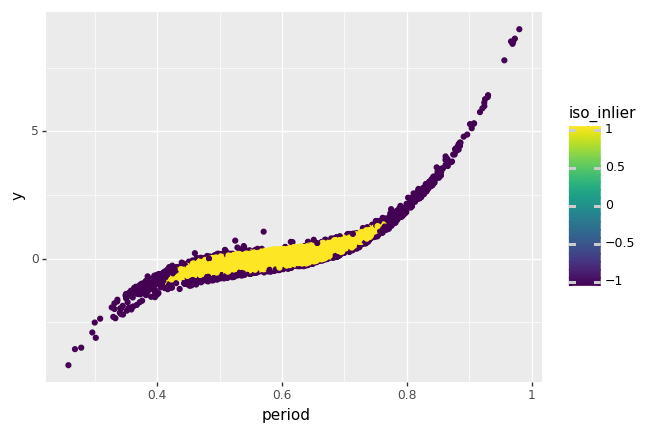

<ggplot: (-9223363295685819581)>

In [70]:
ggplot(spec_data_lmc, aes("period", "y", color="iso_inlier")) +\
    geom_point()

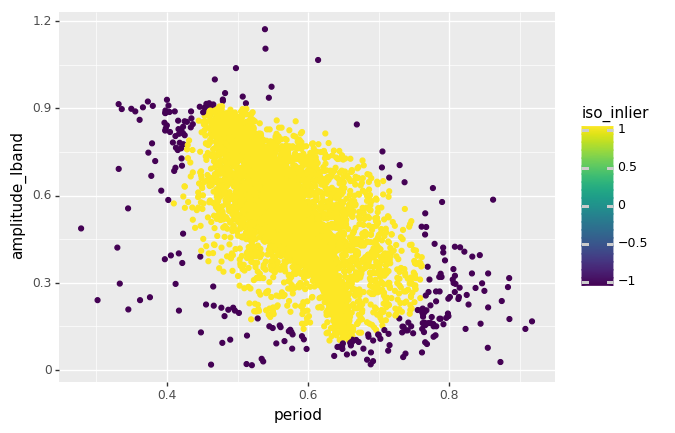

<ggplot: (-9223363295683567914)>

In [71]:
ggplot(spec_data_lmc.iloc[:5000], aes("period", "amplitude_Iband", color="iso_inlier")) +\
    geom_point()

In [72]:
spec_X = spec_data_lmc[spec_data_lmc["iso_inlier"] == 1.0].as_matrix(["y"])

from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#spec = SpectralClustering(n_clusters=7, affinity='nearest_neighbors',
#                           assign_labels='kmeans', random_state = 1)
#spec = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
#                           assign_labels='kmeans', random_state = 1)
#spec = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
#                           assign_labels='kmeans', random_state = 1)
spec = KMeans(n_clusters=3, random_state=0)
scaler = StandardScaler()
spec_pipe = make_pipeline(scaler, spec)
#spec_clusters = spec_pipe.fit_predict(spec_X[:,[0,3]])
spec_clusters = spec_pipe.fit_predict(spec_data_lmc.as_matrix(["y"]))

In [73]:
spec_data_lmc["spec_clusters"] = spec_clusters

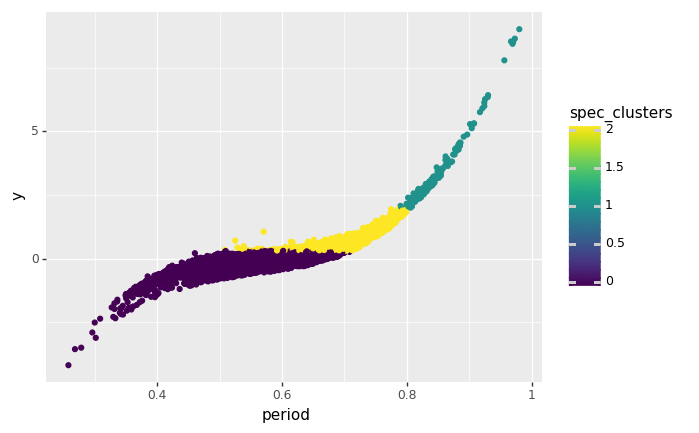

<ggplot: (8741168959927)>

In [74]:
ggplot(spec_data_lmc, aes("period", "y", color="spec_clusters")) +\
    geom_point()

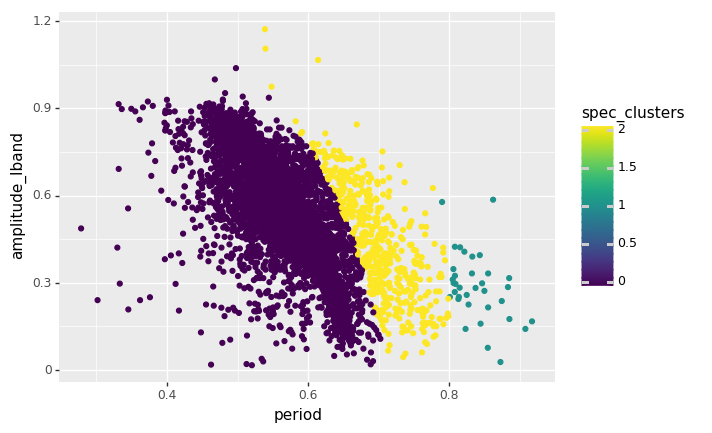

<ggplot: (-9223363295690639921)>

In [75]:
ggplot(spec_data_lmc.iloc[:5000], aes("period", "amplitude_Iband", color="spec_clusters")) +\
    geom_point()

In [76]:
spec_data_lmc["is_oost_ii_2"] = spec_data_lmc["spec_clusters"].map(lambda x: x != 0)

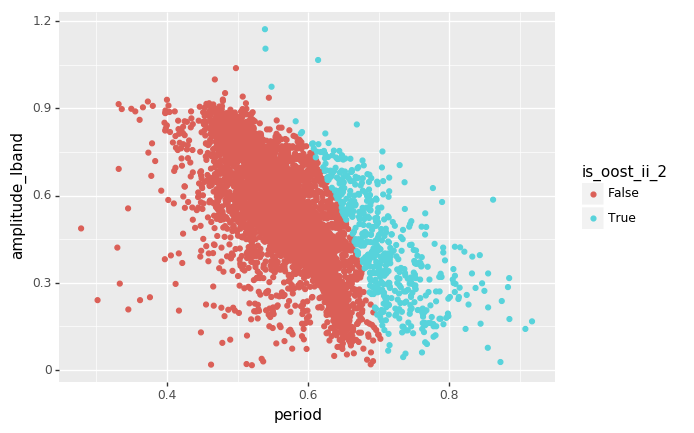

<ggplot: (-9223363295684941175)>

In [84]:
ggplot(spec_data_lmc.iloc[:5000], aes("period", "amplitude_Iband", color="is_oost_ii_2")) +\
    geom_point()

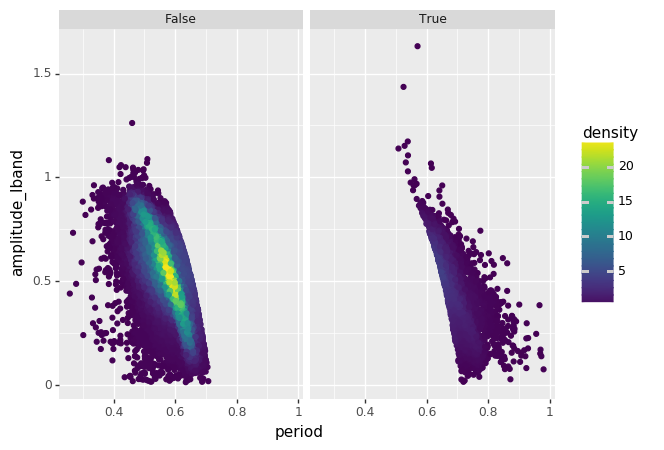

<ggplot: (8741168908208)>

In [78]:
ggplot(spec_data_lmc, aes("period", "amplitude_Iband", color="density")) +\
    facet_wrap("~is_oost_ii_2") +\
    geom_point()

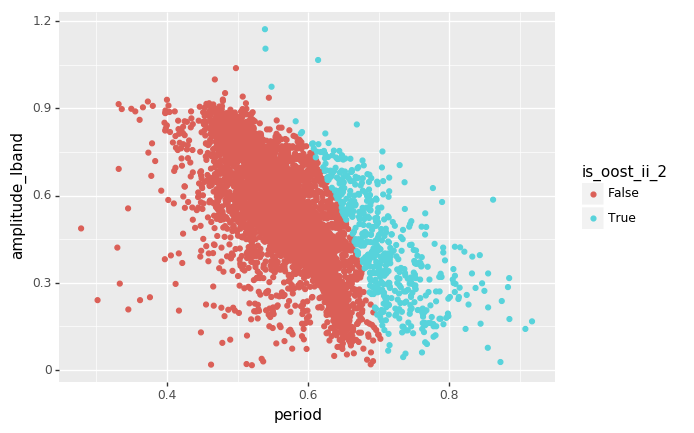

<ggplot: (-9223363295684846932)>

In [85]:
ggplot(spec_data_lmc.iloc[:5000], aes("period", "amplitude_Iband", color="is_oost_ii_2")) +\
    geom_point()

In [80]:
from scipy.optimize import leastsq
from functools import partial

from scipy.optimize import curve_fit

def model(x, a, b, c, d):
    return a + b * np.log10(c + d * x)

def cost(X, y, coef):
    return (y - model(coef, X))[:,0]

cost_function = partial(cost, dense.as_matrix(["period"])[:5000],
                        dense.as_matrix(["amplitude_Iband"][:5000]))

num_coef = 2
initial_coef = np.zeros(num_coef)

#fitted_coef, success = leastsq(cost_function, initial_coef)
X = dense["period"][:5000]
y = dense["amplitude_Iband"][:5000]
popt, pcov = curve_fit(model, X, y)

print(popt)

#print(fitted_coef)

#coef = fitted_coef[:]

#print(np.sum(np.square(cost_function(fitted_coef))))

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


[-0.94129577  6.08670896  3.15038468 -2.42838251]


In [81]:
X = spec_data_lmc.as_matrix(["period"])
#y = model(coef, X)[0]
y = model(X, *popt)

print(y)

spec_data_lmc["line"] = y

X = dense.as_matrix(["period"])
#y = model(coef, X)[0]
y = model(X, *popt)

print(y)

dense["line"] = y

[[ 0.31589125]
 [ 0.35247835]
 [ 0.22768017]
 ..., 
 [ 0.12757938]
 [ 0.32692438]
 [ 0.50255324]]
[[ 0.35247835]
 [ 0.4509543 ]
 [ 0.6239602 ]
 ..., 
 [ 0.66881518]
 [ 0.4431832 ]
 [ 0.50255324]]


/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


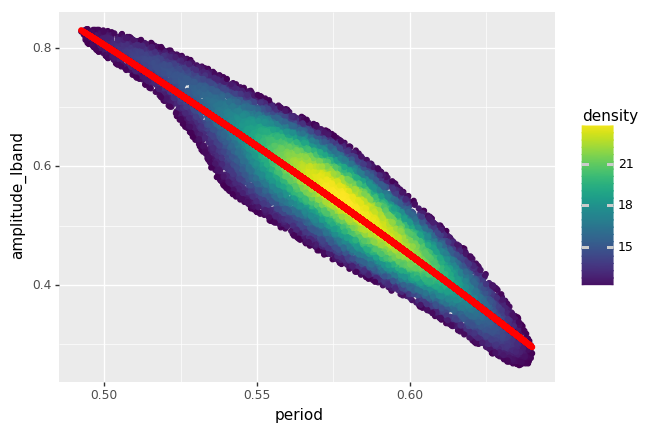

<ggplot: (-9223363295684941091)>

In [82]:
ggplot(dense, aes("period", "amplitude_Iband", color="density")) +\
    geom_point() +\
    geom_point(aes("period", "line"), color="Red")

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 228 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


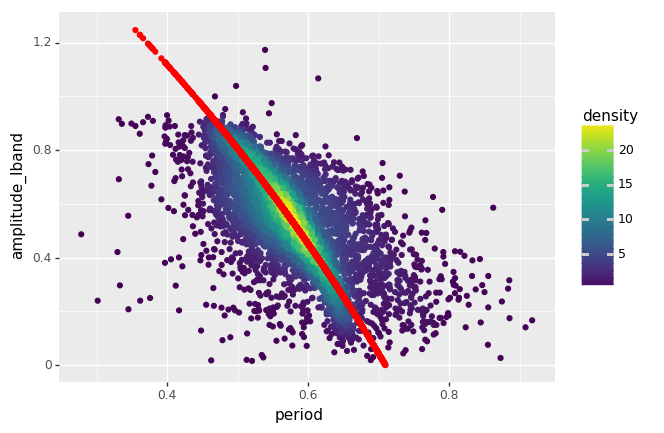

<ggplot: (8741177037011)>

In [83]:
ggplot(spec_data_lmc.iloc[:5000], aes("period", "amplitude_Iband", color="density")) +\
    geom_point() +\
    geom_point(aes("period", "line"), color="Red") +\
    ylim(0.0, 1.25)